## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
mouse_id=merge_df["Mouse ID"].value_counts()
mouse_id.count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merge_df[["Mouse ID", "Timepoint"]].value_counts()
duplicate_mouse.head()


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df=merge_df.set_index("Mouse ID")

mouse_trap=df.loc[["g989"][:]]
print(mouse_trap)


         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_house= merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
check_df=clean_house.set_index("Mouse ID")

check_trap=check_df.loc[["g989"][:]]
print(check_trap)


         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               48.786801                 0  
g989               51.745156                 0  
g989               51.325852                 1  
g989               55.326

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table=clean_house[["Tumor Volume (mm3)","Drug Regimen"]]
table.describe()

,Tumor Volume (mm3)
count,1888.000000
mean,50.449276
std,8.904565
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
#tumor =clean_house["Tumor Volume (mm3)"]

print(f"The mean Drug Regime of th study is: {round(table.mean(),2)}")

print(f"The median Drug Regime of th study is: {round(table.median(),2)}")

print(f"The standard deviation of Drug Regime is: {round(table.std(),2)}")

var_numpy = np.var(table,ddof = 0)
print(f"The Drug Regime variance using the NumPy module is {var_numpy}")

#why = table.sample(10)
#print(f"The SEM value for the sample Drug Regime data is {sem(why.Tumor Volume (mm3))}")



The mean Drug Regime of th study is: Tumor Volume (mm3)    50.45
dtype: float64
The median Drug Regime of th study is: Tumor Volume (mm3)    48.95
dtype: float64
The standard deviation of Drug Regime is: Tumor Volume (mm3)    8.9
dtype: float64
The Drug Regime variance using the NumPy module is Tumor Volume (mm3)    79.24928
dtype: float64


In [10]:
# Assemble the resulting series into a single summary dataframe.
Tumor_Statistics=pd.DataFrame({"":["Mean","Median","Standard Deviation","Variance"],
                              "Tumor Volume (mm3)":[50.45,48.95,8.902,79.24]})
Tumor_Statistics

,,Tumor Volume (mm3)
0,Mean,50.450
1,Median,48.950
2,Standard Deviation,8.902
3,Variance,79.240


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Drugs= clean_house["Drug Regimen"].unique()
Drugs


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
Drug_Measurments=table.groupby(["Drug Regimen"]).sum()
Drug_Measurments

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ketapril,10384.299876
Naftisol,10105.671026
Placebo,9780.078122
Propriva,8173.380288
Ramicane,9169.417875
Stelasyn,9816.199991


([<matplotlib.axis.XTick at 0x29139223910>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

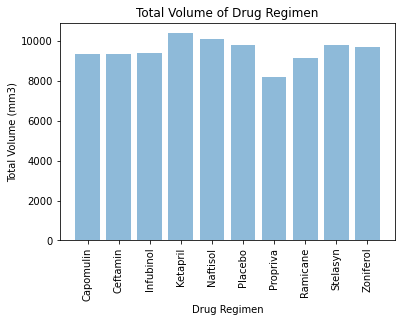

In [15]:
Tumor_Volume= [9355,9361,9413,10384,10105,9780,8173,9169,9816,9689]
x_axis=np.arange(len(Tumor_Volume))

plt.bar(x_axis,Tumor_Volume,alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Total Volume of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Volume (mm3)")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

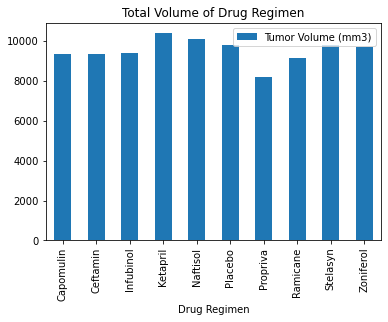

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Use DataFrame.plot() in order to create a bar chart of the data
Drug_Measurments.plot(kind="bar")

# Set a title for the chart
plt.title("Total Volume of Drug Regimen")
plt.show()
plt.tight_layout()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex=clean_house["Sex"].value_counts()
Sex


Male      958
Female    930
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

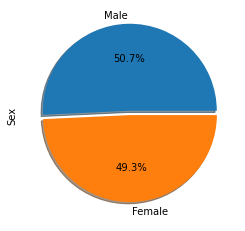

In [22]:
explode= (0.05,0)
Sex.plot(kind="pie",autopct="%1.1f%%", shadow=True,explode=explode)


([<matplotlib.patches.Wedge at 0x291395b9070>,
 [Text(-0.02678757209232827, 1.1496879689643615, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.015140801617402935, 0.6498236346320303, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

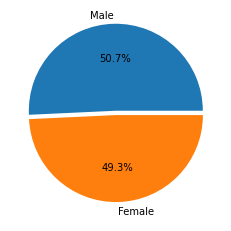

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Ratio=[958,930]
Male_vs_Female=["Male","Female"]
explode= (0.05,0)

plt.pie(Ratio,explode=explode,labels=Male_vs_Female,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
